Shape: (200, 4)
Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates: 0
Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary Statistics:
        Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000      200.00000      200.000000
mean   2100.500000   43.42500    85957.25000       51.295000
std      57.879185   14.94191    38605.01739       29.926845
min    2001.000000   18.00000    20854.00000        1.000000
25%    2050.750000   31.00000    54740.00000       24.000000
50%    2100.500000   43.50000    86931.00000       52.000000
75%    2150.250000   56.00000   118200.00000       76.000000
max    2200.000000   69.00000   148391.00000      100.000000


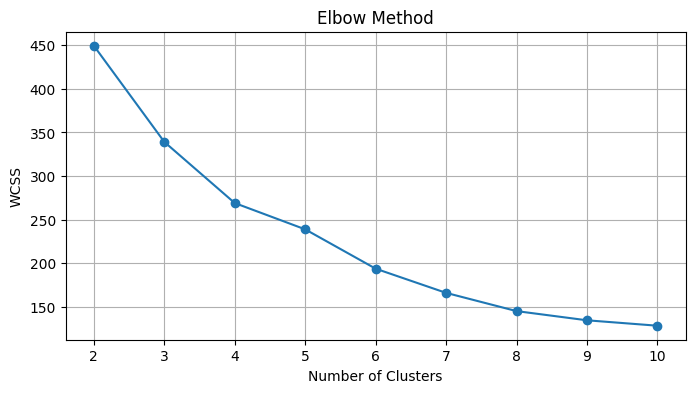

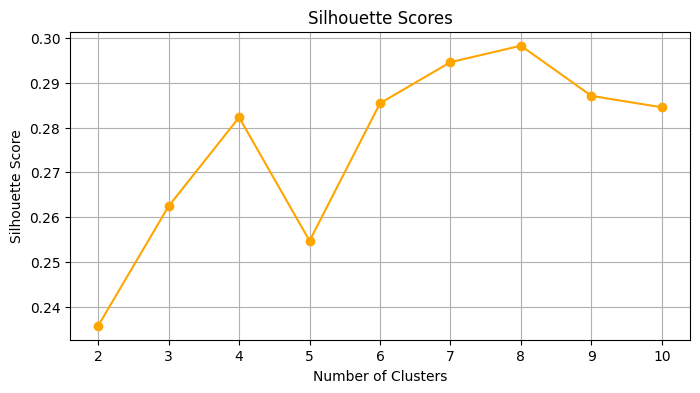

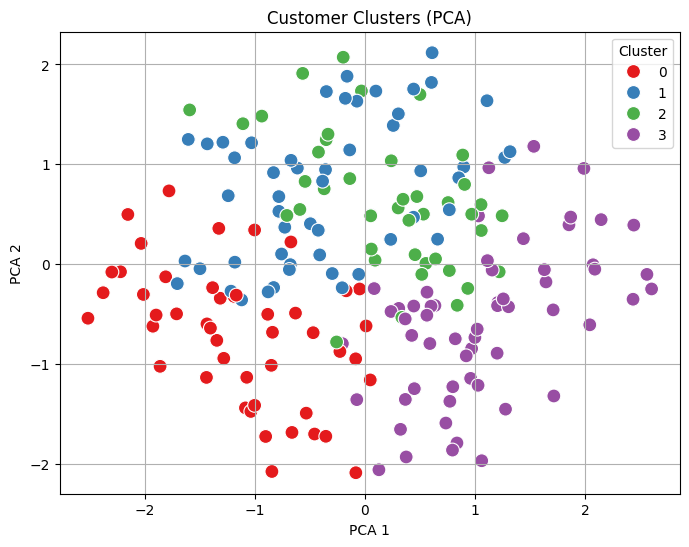

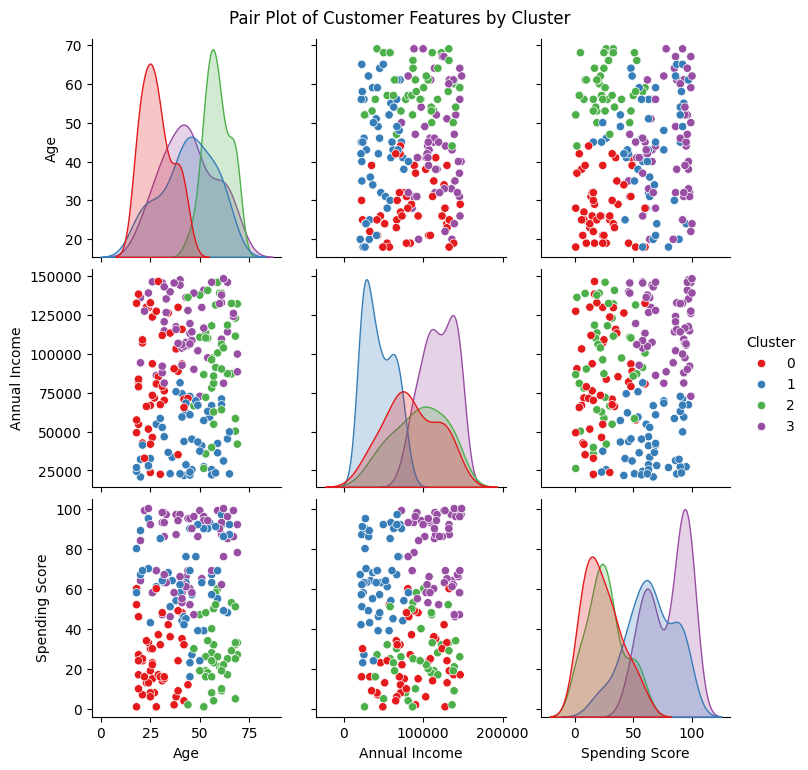

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load dataset
df = pd.read_csv("customer_data.csv")

# Step 2: Inspect data
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

# Step 3: Data Preprocessing (Standardization)
features = df[['Age', 'Annual Income', 'Spending Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 4: Elbow Method & Silhouette Scores
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 5: Apply KMeans Clustering
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: PCA for 2D Visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot PCA Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Step 7: Pair Plot of features within clusters
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle("Pair Plot of Customer Features by Cluster", y=1.02)
plt.show()

# Step 8: Save Output Files
df.to_csv("clustered_customers.csv", index=False)
pca_df = df[['Customer ID', 'PCA1', 'PCA2', 'Cluster']]
pca_df.to_csv("pca_scatter.csv", index=False)

